In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 
### Associated lectures: [Lectures 7, 8](https://github.com/UBC-CS/cpsc330-2023W1/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports 

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
import hashlib


def my_sha1(text):
    return hashlib.sha1(text.encode("utf-8")).hexdigest()

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: implementing `DummyClassifier`
<hr>
rubric={autograde}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.
 
As a reminder, `DummyClassifier` is meant as a baseline and is generally a simple "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's and 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get you started, I have given you a `return` statement in each case that returns the correct data type: 
- `fit` returns nothing
- `predict` returns an array whose size is the number of examples
- `predict_proba` returns an array whose size is the number of examples x 2, and
- `score` returns a float

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data. **Your `score` function should call your `predict` function**. Again, you can compare with `DummyClassifier` using the code below.

`sklearn`'s `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "eagle", etc. However, for the sake of simplifying this question, we will consider **binary classification** only. Furthermore, we will assume that these classes are encoded as 0 and 1. In other words, you can safely assume that the variable y contains only 0's and 1's

<div class="alert alert-warning">

Solution_1
    
</div>

In [4]:
class MyDummyClassifier:

    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0's and 1's.
    """
    def fit(self, X, y):
        """
        Fit the Dummy Classifier to the training data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Training data.
        - y (array-like, shape (n_samples,)): Target labels (0's and 1's).

        Returns:
        - None
        """
        # Replace with your code
        self.a = 0
        self.b = 0
        for i in y:
            if i == 0: 
                self.a += 1
            else:
                self.b += 1
                
        return None  # Replace with your code

    def predict(self, X):
        """
        Predict the target labels for the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.

        Returns:
        - y_pred (array-like, shape (n_samples,)): Predicted target labels.
        """
        predictions = np.zeros(X.shape[0])  # initializing with all predictions set to 0
        # Replace with your code
        if self.a < self.b:
            predictions = np.ones(X.shape[0])
        return predictions

    def predict_proba(self, X):
        """
        Predict class probabilities for the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.

        Returns:
        - probs (array-like, shape (n_samples, 2)): Predicted class probabilities.
          Column 0 corresponds to class 0, and column 1 corresponds to class 1.
        """
        probs = np.zeros((X.shape[0], 2))  # initializing all probabilities set to 0.
        # Replace with your code
        probs = np.full((X.shape[0], 2), [self.a, self.b])
        return probs  # Replace with your code

    def score(self, X, y):
        """
        Calculate the accuracy of the model on the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.
        - y (array-like, shape (n_samples,)): True target labels.

        Returns:
        - accuracy (float): Accuracy of the model on the input data.
        """
        # Replace with your code
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [5]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

Below are some tests for `predict_proba`.

In [6]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

AssertionError: 

Below are some tests for `score`.

_Points:_ 10

In [7]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

In [8]:
grader.check("q1")

q1 results: All test cases passed!

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be working with a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` under the data directory in this folder. As usual, please do not submit the dataset when you submit the assignment. 

In [9]:
tweets_df = pd.read_csv("data/realdonaldtrump.csv", index_col=0)
tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags
id,,,,,,,
1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [10]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [11]:
y = tweets_df["retweets"] > 10_000

To make predictions, we'll be using only the content (text) of the tweet. 

In [12]:
X = tweets_df["content"]

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Ordering the steps
rubric={points}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

**Your tasks:**
1. Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
2. Add a short comment above each step to describe what the code is doing.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 5

In [ ]:
# YOUR COMMENT HERE
countvec = CountVectorizer(stop_words="english")

# YOUR COMMENT HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=123
)

# YOUR COMMENT HERE
cv_score = cross_val_score(pipe, X_train, y_train).mean()

# YOUR COMMENT HERE
pipe = make_pipeline(countvec, lr)

# YOUR COMMENT HERE
lr = LogisticRegression(max_iter=1000, random_state=123)

In [13]:
# create transformer object that converts a collection of text documents to a matrix of word counts
countvec = CountVectorizer(stop_words="english")

# 60-40 train test split on data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=123
)

# create logistic regression
lr = LogisticRegression(max_iter=1000, random_state=123)

# make the pipeline
pipe = make_pipeline(countvec, lr)

# score the model
cv_score = cross_val_score(pipe, X_train, y_train).mean()

cv_score

0.8953863898500576

<!-- END QUESTION -->

<br><br>

### 2.2 Baseline
rubric={autograde}

**Your tasks:**

1. Run 5-fold cross-validation with `sklearn`'s `DummyClassifier` on this dataset. Store the mean cross-validation score in a variable called `dummy_cv_score` given below.

> You should be able to use `MyDummyClassifier` above. But sklearn will likely complain if you try to pass it to `cross_val_score` or `cross_validate`. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [14]:
model = DummyClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
dummy_cv_score = scores.mean()

dummy_cv_score

0.7423875432525952

In [15]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Discussion
rubric={points}

**Your tasks:**

1. Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
2. Above we averaged the scores from the 5 folds of cross-validation of logistic regression. Print out the 5 individual scores. Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores. 
3. Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.) 
4. How does the size of this dataset (number of rows) compare to [the cities dataset](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/lectures/data/canada_usa_cities.csv) we have been using in the lecture notes? How does this relate to the different sub-scores from the 5 folds?

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [16]:
cv_scores = scores
scores

array([0.74221453, 0.74221453, 0.74250288, 0.74250288, 0.74250288])

1. Compare the DummyClassifier score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
   The average score for dummyclassifier is 0.74 whereas the score for logistic regression is 0.89, which is significantly higher than the dummyclassifier score. this indicates that the logistic regression is a pretty accurate predictor for unseen data.
   
3. Above we averaged the scores from the 5 folds of cross-validation of logistic regression. Print out the 5 individual scores. 
   array([0.74221453, 0.74221453, 0.74250288, 0.74250288, 0.74250288])

5. Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.)
   The 5 scores are pretty close to each other. They are all a little bit more than 0.742
   
7. How does the size of this dataset (number of rows) compare to [the cities dataset](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/lectures/data/canada_usa_cities.csv) we have been using in the lecture notes? How does this relate to the different sub-scores from the 5 folds?
    This dataset contains 43352 rows whereas the cities dataset only contains 210 rows. A dataset with more data will likely have less variation due to the law of large numbers.

<!-- END QUESTION -->

<br><br>

### 2.4 Probability scores
rubric={autograde}

Here we train a logistic regression classifier on the entire training set: 

In [17]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"),
    LogisticRegression(max_iter=1000, random_state=123),
)
pipe_lr.fit(X_train, y_train);

**Your tasks:**

1. Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Store the tweet and the associated probability in the variables `tweet` and `prob`, respectively. 

> Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 4

In [18]:
pipe_pred = pipe_lr.predict_proba(X_test)[:, 1]
i = np.argmax(pipe_pred)

tweet = X_test.iloc[i]
prob = pipe_pred[i]

In [19]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5 Coefficients
rubric={autograde}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `Pipeline` object as follows:

In [20]:
vec_from_pipe = pipe_lr.named_steps["countvectorizer"]
lr_from_pipe = pipe_lr.named_steps["logisticregression"]

**Your tasks:**

Using these extracted components above, get the five words with the highest coefficients and 5 words with smallest coefficients. Store them as lists in `top_5_words` and `bottom_5_words` variables, respectively. 

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 4

In [21]:
bottom_5_words = []
top_5_words = []
i = vec_from_pipe.get_feature_names_out()
pd.DataFrame(np.argsort(lr_from_pipe.coef_))
j = [20103, 4280, 24800, 8527, 23987]
k = [9767, 7024, 11658, 24639, 7923]
for x in j:
    bottom_5_words.append(i[x])

for x in k:
    top_5_words.append(i[x])

In [22]:
top_5_words

['fake', 'coronavirus', 'harassment', 'transcripts', 'democrats']

In [23]:
bottom_5_words

['realdonaldtrump', 'barackobama', 'trump2016pic', 'donaldtrump', 'thanks']

In [24]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

### 2.6 Running a cross-validation fold without sklearn tools 
rubric={autograde}

Sklearn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. 

**Your tasks:**

1. Compute logistic regression's validation score on the first fold, that is, train on 80% and validate on 20% of the training data (`X_train`) without using sklearn `Pipeline` or `cross_validate` or `cross_val_score`. Store the score of the fold in a variable called `fold_score`. Recall that `cross_validation` in `sklearn` does not shuffle the data by default.    

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split with `train_test_split` and `shuffle=False`):
> Note: avoid assigning the variable names `X_train`, `y_train`, `X_test`, `y_test` to your folds when you call `train_test_split`. You'll be using those again later in the assignment.

In [25]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000, random_state=123)

> Meta-comment: you might be wondering why we're going into "implementation" here if this course is about _applied_ ML. In CPSC 340, we would go all the way down into `LogisticRegression` and understand how `fit` works, line by line. Here we're not going into that at all, but I still think this type of question (and Exercise 1) is a useful middle ground. I do want you to know what is going on in `Pipeline` and in `cross_validate` even if we don't cover the details of `fit`. To get into logistic regression's `fit` requires a bunch of math; here, we're keeping it more conceptual and avoiding all those prerequisites.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 8

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
X_train_trans = countvec.fit_transform(X_train1)
X_test_trans = countvec.transform(X_test1)

lr.fit(X_train_trans, y_train1)
y_train_pred = lr.predict(X_test_trans)

correct_pred = sum(y_train_pred == y_test1)
fold_score = correct_pred/len(y_test1)


In [27]:
fold_score

0.9008073817762399

In [28]:
grader.check("q2.6")

q2.6 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Hyperparameter optimization
<hr>

<!-- BEGIN QUESTION -->

### 3.1 Optimizing `max_features` of `CountVectorizer`
rubric={points}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. 

**Your tasks:**
- Based on the plot/output, what value of `max_features` seems best? Briefly explain.

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

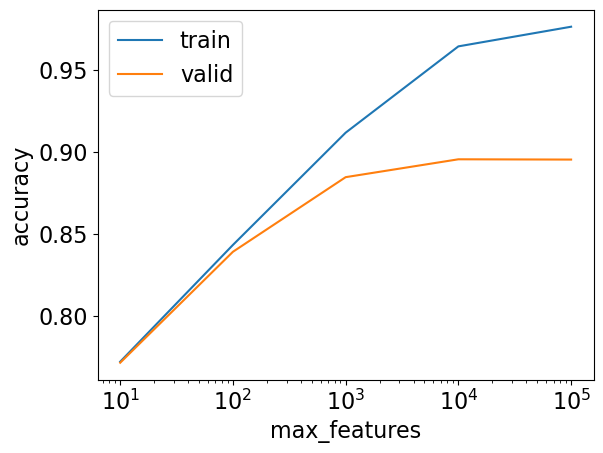

In [29]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
    #     print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000, random_state=123),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [30]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.772131,0.771511
1,100,0.843339,0.839158
2,1000,0.911794,0.884660
3,10000,0.964418,0.895559
4,100000,0.976399,0.895386


<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 2

Based on the output above, the highest cv score occurs when max_features is 10,000, with a difference of around 0.7 between train and cv scores. Since the cv score is the highest at this point, the best value for max_features is 10,000.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Optimizing `C` of `LogisticRegression`
rubric={points}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. 

**Your tasks:**

- Based on the plot, what value of `C` seems best? Briefly explain. 

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

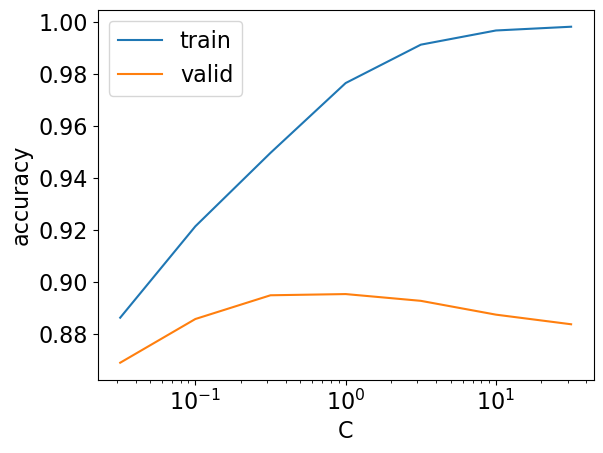

In [31]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english"),
        LogisticRegression(max_iter=1000, C=C, random_state=123),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [32]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.031623,0.886318,0.869031
1,0.100000,0.921396,0.885813
2,0.316228,0.949596,0.894925
3,1.000000,0.976399,0.895386
4,3.162278,0.991133,0.892791
5,10.000000,0.996583,0.887486
6,31.622777,0.998025,0.883795


<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 2

Based on the plot and output above, the cross-validation accuracy is the highest when C = 1.0, with a score of 0.895386. When C is larger than 1.0, the cross validation score decreases which shows that higher values of C might lead to overfitting. Because of this, the best C value should be at C = 1.0.

<!-- END QUESTION -->

<br><br>

### 3.3 Hyperparameter optimization 
rubric={autograde}

Start with the pipeline `pipe` below.

**Your tasks:**
- Create a `GridSearchCV` object named `grid_search` to jointly optimize `max_features` of `CountVectorizer` and `C` of `LogisticRegression` across all the combinations of values we tried above. 
- What are the best values of `max_features` and `C` according to your grid search? Store them in variables `best_max_features` and `best_C`, respectively.  
- Store the best score returned by the grid search in a variable called `best_score`. 

> The code might be a bit slow here. Setting `n_jobs=-1` should speed it up if you have a multi-core processor.

In [33]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"),
    LogisticRegression(max_iter=1000, random_state=123),
)

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 8

In [34]:
param_grid = {
    'countvectorizer__max_features': max_features,
    'logisticregression__C': C_vals,
}

grid_search = GridSearchCV(pipe_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

best_max_features = grid_search.best_params_['countvectorizer__max_features']
best_C = grid_search.best_params_['logisticregression__C']
best_score = grid_search.best_score_

print(best_max_features, best_C)

10000 1.0


In [35]:
grader.check("q3.3")

q3.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Discussion 
rubric={points}

- Do the best values of hyperparameters found by Grid Search agree with what you found in 3.1 and 3.2? 
- Generally speaking, _should_ these values agree with what you found in parts  3.1 and 3.2? Why or why not? 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 2

1. Yes. The best hyperparameter values given by GridSearch are C=1.0 and max_features=10,000, which aligns with the findings in 3.1 and 3.2
2. Yes. Generally speaking the optimized hyperparameters should align with the values that give the best cross validation score, which is what we found in 3.1 and 3.2.

<!-- END QUESTION -->

<br><br>

### 3.5 Test score
rubric={autograde}

**Your tasks:**
- Evaluate your final model on the test set. Store the test accuracy in the variable called `test_score`.

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 2

In [36]:
test_score = grid_search.score(X_test, y_test)

test_score

0.891780716592342

In [37]:
grader.check("q3.5")

q3.5 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.6 Discussion
rubric={points}

- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

<div class="alert alert-warning">

Solution_3.6
    
</div>

_Points:_ 2

The test accuracy is slightly lower than the validation accuracy which is quite normal since the validation accuracy is based on cross-validation performed on the training data, while the test accuracy comes from unseen test sets.

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Very short answer questions
<hr>
rubric={points}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
2. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
3. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 6

1. Calling fit_transform on the test data means the vectorizer will learn the vocabulary from the test set, which leads to data leakage and violates the Golden Rule.
2. I would choose predict_proba because it provides more detailed information by returning class probabilities, allowing you to make threshold-based decisions and assess the model's confidence, whereas predict only gives the final classification label wihtout any additional information.
3.  RandomizedSearchCV can explore the hyperparameter space more efficiently by testing a subset of the possible combinations, saving time and computational resources. It also scales better with large hyperparameter spaces since it doesn't require evaluating all possible combinations like GridSearchCV does.

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

Congratulations on finishing the homework! 

![](./img/eva-well-done.png)